# Is Fandango Still Inflating Ratings?
In October 2015, Walt Hickey from FiveThirtyEight published a populara [article](https://fivethirtyeight.com/features/fandango-movies-ratings/) where he presented strong evidence that suggests that Fandango's movie rating system was biased and dishonest. In this project, I will analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system following Hickey's analysis.

## Understanding the Data

We'll work with two samples of movie ratings: the data in one sample was collected prior to Hickey's analysis, while the other sample was collected after. Let's start by reading in the two samples (which are stored as CSV files) and exploring their structure.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns = 100

In [68]:
previous = pd.read_csv("fandango_score_comparison.csv")
after = pd.read_csv("movie_ratings_16_17.csv")

In [69]:
previous.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [70]:
after.head(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


In [71]:
fandango_previous = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_after = after[['movie', 'year', 'fandango']].copy()

In [72]:
fandango_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [73]:
fandango_after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


Our goal is to determine whether there has been any change in Fandango's rating system following Hickey's analysis. The population of interest for our analysis comprises all the movie ratings stored on Fandango's website, regardless of the releasing year.

Because we want to determine if the parameters of this population changed after Hickey's analysis, we're interested in sampling the population at two different periods in time — before and after Hickey's analysis — so we can compare the two states.

The data we're working with was sampled at the moments we want: one sample was taken prior to the analysis, and the other was taken after the analysis. We want to describe the population, so we need to make sure that the samples are representative; otherwise, we should expect a large sampling error and, ultimately, inaccurate conclusions.

From Hickey's article and from the [README.md](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) of the data set's repository, we can see that he used the following sampling criteria:

- The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
- The movie must have had tickets on sale in 2015.

The sampling was clearly not random because not every movie had the same chance to be included in the sample — some movies didn't have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015). It's questionable whether this sample is representative of the entire population we're interested in describing. It seems more likely that it isn't, mostly because this sample is subject to temporal trends (e.g., movies in 2015 might have been outstandingly good or bad compared to other years).

The sampling conditions for our other sample were the following (as it can be read in the [README.md](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md) of the data set's repository):

The movie must have been released in 2016 or later.
The movie must have had a considerable number of votes and reviews (it's unclear how many from the README.md or from the data).
This second sample is also subject to temporal trends, and it's unlikely to be representative of our population of interest.

Both these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions. While these samples were good enough for their research, they don't seem too useful for us.

## Changing the Goal of our Analysis

At this point, we can either collect new data or change our the goal of our analysis. We choose the latter and place some limitations on our initial goal.

Instead of trying to determine whether there has been any change in Fandango's rating system following Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.

## Isolating the Samples We Need

With this new research goal, we have two populations of interest:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

We need to be clear about what counts as popular movies. We'll use Hickey's benchmark of 30 fan ratings and count a movie as popular only if it has 30 fan ratings or more on Fandango's website.

In [74]:
# check first dataset if all movies have at least 30 ratings
fandango_previous["Fandango_votes"].describe()

count      146.000000
mean      3848.787671
std       6357.778617
min         35.000000
25%        222.250000
50%       1446.000000
75%       4439.500000
max      34846.000000
Name: Fandango_votes, dtype: float64

Although one of the sampling criteria in our second sample is movie popularity, the sample doesn't provide information about the number of fan ratings. We should be skeptical once more and ask whether this sample is truly representative and contains popular movies (movies with over 30 fan ratings).

One quick way to check the representativity of this sample is to randomly sample 10 movies from it and then check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more.

In [75]:
fandango_after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Ratings for the movies I found:

|Movie|	Fan ratings|
| :-: | :-: |
|Mechanic: Resurrection|	2247
|Warcraft|	7271
|Max Steel|	493
|Me Before You|	5263
|Fantastic Beasts and Where to Find Them|	13400
|Cell|	17
|Genius|	127
|Sully|	11877
|A Hologram for the King|	500
|Captain America: Civil War|	35057

90% of the movies in our sample are popular. This is enough for us to move forward with a bit more confidence.

Now lets isolate movies released from 2015 and 2016

In [76]:
# create regex patter to isolate 2015 year
pattern = r"[0-9]{3}[5-6]"
# isolate 2015 movies
fandango_previous_up = fandango_previous[fandango_previous["FILM"].str.contains(pattern)].copy()

In [77]:
# check the result
fandango_previous_up.shape

(129, 5)

In [78]:
fandango_after_up = fandango_after[fandango_after["year"] == 2016]

In [79]:
# check the result
fandango_after_up.shape

(191, 3)

## Comparing Distribution Shapes for 2015 and 2016

Our goal is to determine whether or not there is any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. One way to do this is to analyze and compare the distributions of movie ratings for the two samples.

We'll start with comparing the shape of the two distributions using kernel density plots.

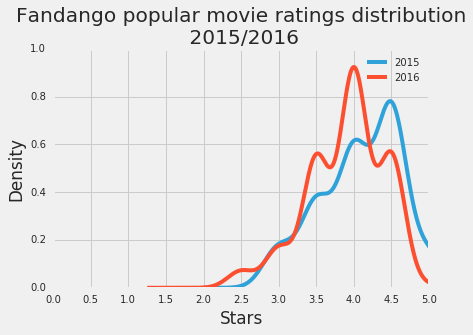

In [80]:
plt.style.use('fivethirtyeight')

fandango_previous_up["Fandango_Stars"].plot.kde(legend = True, label = "2015")
fandango_after_up["fandango"].plot.kde(legend = True, label = "2016")

plt.title("Fandango popular movie ratings distribution\n 2015/2016")
plt.xlim(0, 5)
plt.xlabel("Stars")
plt.ylabel("Density")
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.show()

Two aspects are interesting in the figure above:

- Both distributions are strongly left-skewed.
- The 2016 distribution is slightly shifted to the left relative to the 2015 distribution.

The slight left shift of the 2016 distribution is very interesting for our analysis. It shows that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.

## Comparing Relative Frequencies

It seems we're following a good thread so far, but we need to analyze more granular information. Let's examine the frequency tables of the two distributions to analyze some numbers. Because the datasets have different numbers of movies, we normalize the tables and show percentages instead.

In [81]:
print("2015\n" + "-" * 16 )
fandango_previous_up["Fandango_Stars"].value_counts(normalize = True).sort_index() * 100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [82]:
print("2016\n" + "-" * 16 )
fandango_after_up["fandango"].value_counts(normalize = True).sort_index() * 100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. There clearly is a difference between the two frequency distributions.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings, and this challenges the direction of the change we saw on the kernel density plots.

## Determining the Direction of the Change

Let's take a couple of summary metrics for more precise information about the direction of the change. In what follows, we'll compute the mean, the median, and the mode for both distributions, and then we'll use a bar graph to plot the values.

In [83]:
mean_2015 = fandango_previous_up["Fandango_Stars"].mean()
mean_2016 = fandango_after_up["fandango"].mean()

median_2015 = fandango_previous_up["Fandango_Stars"].median()
median_2016 = fandango_after_up["fandango"].median()

mode_2015 = fandango_previous_up["Fandango_Stars"].mode()[0]
mode_2016 = fandango_after_up["fandango"].mode()[0]

In [84]:
summary = pd.DataFrame()
summary["2015"] = [mean_2015, median_2015, mode_2015]
summary["2016"] = [mean_2016, median_2016, mode_2016]
summary.index = ["mean", "median", "mode"]
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


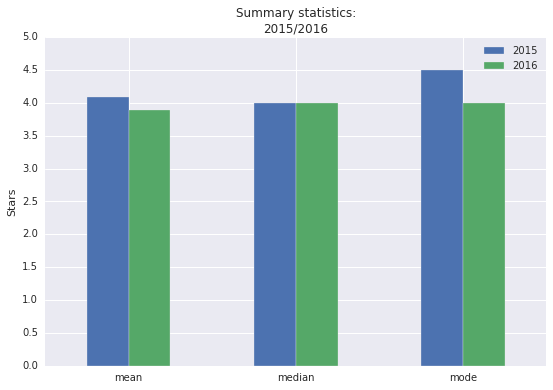

In [85]:
sns.set()
summary.plot.bar()
plt.xticks(rotation = 360)
plt.yticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.ylim(0, 5)
plt.ylabel("Stars")
plt.title("Summary statistics:\n2015/2016")
plt.show()


While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what we saw for the mean, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

## Conclusion

Our analysis showed that there is indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system following Hickey's analysis.